In [36]:
%matplotlib inline
from datetime import datetime
import tkp.utility.coordinates as coords
from scipy.stats import norm
from scipy.optimize import leastsq
import numpy as np
import math
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import glob
import casacore.tables
import tkp.quality.statistics

In [37]:
#archive = '/scratch/peeyush/pipeline/testnewra/2013_try1/*.image'
archive = '/scratch/fhuizing/aartfaac/results/24h/SB002/*.image'

In [38]:

path= []
numbers= []
#x= tkp.quality.statistics.rms(data)

In [39]:
def mad(x, median):
#    return np.mean(np.abs(x - np.median(x, axis)), axis)
    temp= [n*n-(median*median) for n in x]
    return np.sqrt(abs(np.sum(temp))/len(x))
#    return np.sqrt(np.mean(x - np.median(x)**2)



In [ ]:
rmses= []

for fname in glob.glob(archive):
    table = casacore.tables.table(fname)
    data = table[0]["map"].squeeze()
    rmses.append([fname, tkp.quality.statistics.rms(data)])
    
print(len(rmses))

Successful readonly open of default-locked table /scratch/fhuizing/aartfaac/results/24h/SB002/F5.71304e+07_S1-63_T20-11-2013_16-42-23.image: 1 columns, 1 rows
Successful readonly open of default-locked table /scratch/fhuizing/aartfaac/results/24h/SB002/F5.71304e+07_S1-63_T20-11-2013_14-40-03.image: 1 columns, 1 rows
Successful readonly open of default-locked table /scratch/fhuizing/aartfaac/results/24h/SB002/F5.71304e+07_S1-63_T20-11-2013_22-09-49.image: 1 columns, 1 rows
Successful readonly open of default-locked table /scratch/fhuizing/aartfaac/results/24h/SB002/F5.71304e+07_S1-63_T20-11-2013_20-53-45.image: 1 columns, 1 rows
Successful readonly open of default-locked table /scratch/fhuizing/aartfaac/results/24h/SB002/F5.71304e+07_S1-63_T20-11-2013_16-50-00.image: 1 columns, 1 rows
Successful readonly open of default-locked table /scratch/fhuizing/aartfaac/results/24h/SB002/F5.71304e+07_S1-63_T20-11-2013_14-19-27.image: 1 columns, 1 rows
Successful readonly open of default-locked tab

In [32]:
path= []
numbers= []

for y in rmses:
    if not math.isnan(y[1]):
        numbers.append(y[1])

#x= tkp.quality.statistics.rms(data)
med= np.median(numbers)
stand = mad(numbers, med)
print(med)
print(mad(numbers, med))
print(np.std(numbers))
#print(numbers)

for z in rmses:
    if not math.isnan(z[1]):
        if z[1] < med + stand: #before it was .5* stand
            path.append([fname, z[1]])
    else:
        print(z)
#        print(z[1], med+ .5* stand)
#    plt.hist(rmses, bins=50, color='blue')

1.24858556831
1.1797080643
0.980954078825
['/scratch/fhuizing/aartfaac/results/24h/SB002/F5.71304e+07_S1-63_T20-11-2013_15-29-29.image', nan]


In [33]:
newnumb = []

for a in path:
    newnumb.append(a[1])
    
newmed= np.median(newnumb)



In [23]:
#len(rmses)
print(len(path))
#len(path)
#print(rmses)
#print(mad(numbers))

0


In [27]:
print(path)

[]


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

#mu, sigma = 100, 15
x = numbers
(mu, sigma) = norm.fit(x)
hist, bins = np.histogram(x, bins=np.logspace(0.1, 1.0, 500))
width = 0.1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

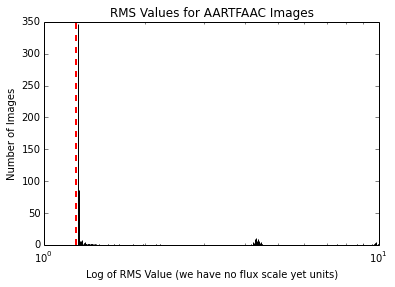

Yo


In [35]:
#plotting!

from matplotlib.ticker import FormatStrFormatter

#histogram stuff
plt.bar(center,hist,align='center',width=width)
plt.gca().set_xscale("log")
plt.title('RMS Values for AARTFAAC Images')
plt.xlabel('Log of RMS Value (we have no flux scale yet units)')
plt.ylabel('Number of Images')

#add the median line
plt.axvline(newmed, color='r', linestyle='dashed', linewidth=2)

#plt.axvline(2, color='b', linestyle='dashed', linewidth=2)

#print(np.newmed(x))

#plt.savefig('AA-rmses.png')
plt.show()
print("Yo")

In [4]:
def res(p, y, x):
# calculate residuals between data and Gaussian model
  m1, sd1, a = p
  y_fit = a*norm2(x, m1, sd1)
  err = y - y_fit
  return err

def guess_p(x):
# estimate the mean and rms as initial inputs to the Gaussian fitting
    median = np.median(x)
    temp=[n*n-(median*median) for n in x]
    rms = math.sqrt((abs(sum(temp))/len(x)))
    return [median, rms, math.sqrt(len(x))]

def norm2(x, mean, sd):
# creates a normal distribution in a simple array for plotting
    normdist = []
    for i in range(len(x)):
        normdist += [1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x[i] - mean)**2/(2*sd**2))]
    return np.array(normdist)

In [12]:
def fit_hist(data, sigma, xlabel, pltname, freq):
# fit a Gaussian distribution to the input data, output a plot and threshold for a given sigma
    if len(data) > 0:
        p=guess_p(rmses)
        mean, rms, threshold = plothist(data, xlabel, pltname, sigma,freq, p)
        return mean, rms, threshold
    else:
        return 0,0,0